In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset("titanic")
# pd.set_option("display.max_rows",None)
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [3]:
data.drop(columns=["embarked", "class", "adult_male", "deck", "alive"], inplace=True)

In [4]:
# The number of siblings and parents or children the passenger had aboard the Titanic.
data = data.rename(columns={"sibsp":"siblings", "parch":"parChild"})

#  The fare the passenger paid for the ticket..
data = data.rename(columns={"fare":"ticketPrice"})

In [5]:
data.head(3)

,survived,pclass,sex,age,siblings,parChild,ticketPrice,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,True


In [6]:
data.shape

(891, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   siblings     891 non-null    int64  
 5   parChild     891 non-null    int64  
 6   ticketPrice  891 non-null    float64
 7   who          891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [8]:
(data.isnull().sum()/data.shape[0])* 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
siblings        0.000000
parChild        0.000000
ticketPrice     0.000000
who             0.000000
embark_town     0.224467
alone           0.000000
dtype: float64

In [9]:
data["age"].fillna(data["age"].mean(), inplace=True)
data["embark_town"].fillna(data["embark_town"].mode()[0], inplace=True)

C:\Users\arman\AppData\Local\Temp\ipykernel_17536\1311328871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["age"].fillna(data["age"].mean(), inplace=True)
C:\Users\arman\AppData\Local\Temp\ipykernel_17536\1311328871.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [10]:
(data.isnull().sum()/data.shape[0])* 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
siblings       0.0
parChild       0.0
ticketPrice    0.0
who            0.0
embark_town    0.0
alone          0.0
dtype: float64

In [11]:
data.head(3)

,survived,pclass,sex,age,siblings,parChild,ticketPrice,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,True


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
sex_en = LabelEncoder()
data["sex"] = sex_en.fit_transform(data["sex"])

In [14]:
who_en = LabelEncoder()
data["who"] = who_en.fit_transform(data["who"])

In [15]:
embark_town_en = LabelEncoder()
data["embark_town"] = embark_town_en.fit_transform(data["embark_town"])

In [16]:
alone_en = LabelEncoder()
data["alone"] = alone_en.fit_transform(data["alone"])

In [17]:
data.head(11)

,survived,pclass,sex,age,siblings,parChild,ticketPrice,who,embark_town,alone
0,0,3,1,22.000000,1,0,7.2500,1,2,0
1,1,1,0,38.000000,1,0,71.2833,2,0,0
2,1,3,0,26.000000,0,0,7.9250,2,2,1
3,1,1,0,35.000000,1,0,53.1000,2,2,0
4,0,3,1,35.000000,0,0,8.0500,1,2,1
5,0,3,1,29.699118,0,0,8.4583,1,1,1
6,0,1,1,54.000000,0,0,51.8625,1,2,1
7,0,3,1,2.000000,3,1,21.0750,0,2,0
8,1,3,0,27.000000,0,2,11.1333,2,2,0
9,1,2,0,14.000000,1,0,30.0708,0,0,0


In [18]:
data.describe()

,survived,pclass,sex,age,siblings,parChild,ticketPrice,who,embark_town,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.210999,1.536476,0.602694
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.594291,0.791503,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,1.000000,2.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,2.000000,1.000000


In [19]:
data.shape

(891, 10)

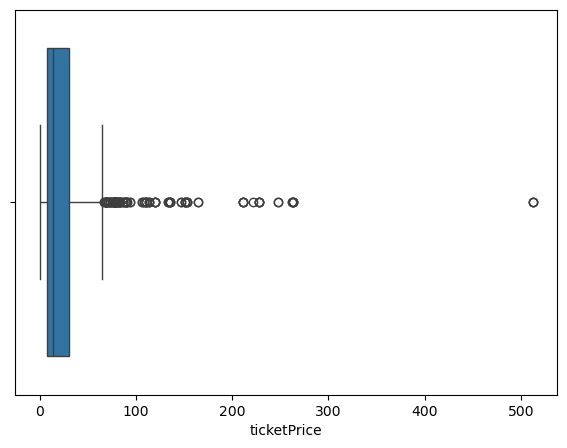

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(x = "ticketPrice", data = data)
plt.show()

In [21]:
q1 = data["ticketPrice"].quantile(0.25)
q3 = data["ticketPrice"].quantile(0.75)

IQR = q3 - q1

min_range = q1 - (1*IQR)
max_range = q3 + (1*IQR)
min_range , max_range

(-15.179200000000002, 54.089600000000004)

In [22]:
data = data[data["ticketPrice"] <= max_range]
data.shape

(750, 10)

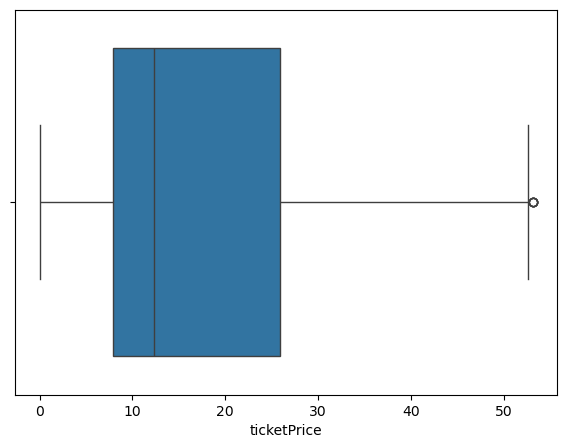

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(x = "ticketPrice", data = data)
plt.show()

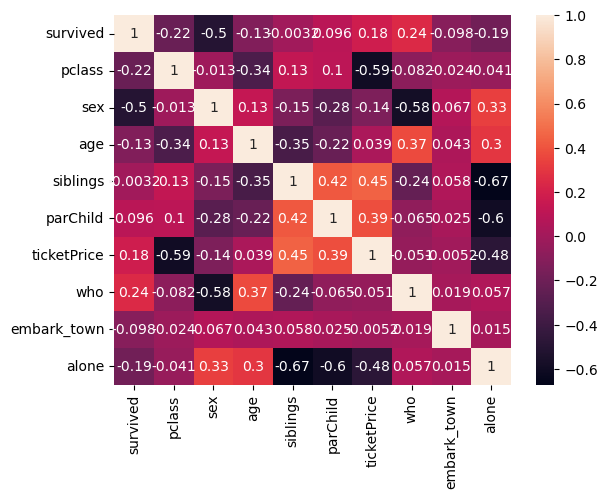

In [24]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [25]:
x = data.drop(columns="survived")
y = data["survived"]

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(x)

x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=52)

# Model Apply

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)*100 , knn.score(x_train, y_train)*100

(87.33333333333333, 87.16666666666667)

In [30]:
# for i in range(1,50):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train, y_train)
#     print(i,knn.score(x_test, y_test)*100 , knn.score(x_train, y_train)*100)

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [32]:
# Compute confusion matrix
cf = confusion_matrix(y_test, knn.predict(x_test))
cf

array([[100,   7],
       [ 12,  31]], dtype=int64)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_test, knn.predict(x_test)) , mean_absolute_error(y_test, knn.predict(x_test))

(0.12666666666666668, 0.12666666666666668)

In [34]:
y_test.head(3)

294    0
667    0
219    0
Name: survived, dtype: int64

In [35]:
knn.predict([[-0.714194,-1.484967,-0.071662,-0.482205,-0.427196,-0.330732,1.453882,0.533242,0.717741]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [36]:
x_test.head(3)

,pclass,sex,age,siblings,parChild,ticketPrice,who,embark_town,alone
254,0.691699,0.673415,-0.385643,-0.482205,-0.427196,-0.741516,-0.268727,0.533242,0.717741
559,0.691699,0.673415,0.061711,-0.482205,-0.427196,-0.751953,-0.268727,0.533242,0.717741
191,-0.714194,0.673415,0.085328,-0.482205,-0.427196,-0.516502,-0.268727,0.533242,0.717741
